## k-NN with Scikit-Learn

In [2]:
%config InlineBackend.figure_format = 'retina'
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import neighbors
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

### Load the Ionosphere dataset

In [3]:
# Ionosphere dataset.
X_and_Y = np.load('ionosphere.npy').astype(np.float32) # Load data from file.

np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)      # Shuffle the data.
X = X_and_Y[:, 0:-1]            # First column to second last column: Features. 
Y = X_and_Y[:, -1]              # Last column: Labels.
Y[Y==0] = -1                    # Convert labels from {0, 1} to {-1, 1}.

print(X.shape)      # (351, 34)
print(Y.shape)      # (351,)
print(X_and_Y[0])               
# The result should be:
# [ 1.       0.      -0.205    0.2875   0.23     0.1      0.2825   0.3175
#   0.3225   0.35     0.36285 -0.34617  0.0925   0.275   -0.095    0.21
#  -0.0875   0.235   -0.34187  0.31408 -0.48    -0.08     0.29908  0.33176
#  -0.58    -0.24     0.3219  -0.28475 -0.47     0.185   -0.27104 -0.31228
#   0.40445  0.0305   1.     ]

FileNotFoundError: [Errno 2] No such file or directory: 'ionosphere.npy'

In [4]:
# Divide the data points into training set and test set.
X_shuffled = X
Y_shuffled = Y
X_train = X_shuffled[:200][:,10:]          # Shape: (200, 24)
Y_train = Y_shuffled[:200]                 # Shape: (200,)
X_test = X_shuffled[200:][:,10:]           # Shape: (151, 24)
Y_test = Y_shuffled[200:]                  # Shape: (151,)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

NameError: name 'X' is not defined

In [5]:
X_train[0].shape

NameError: name 'X_train' is not defined

### k-NN Using Scikit-Learn

In [4]:
# Perform grid search for best number of nearest neighbors.

# 1. Create a k-NN classifier.
estimator = neighbors.KNeighborsClassifier()

# 2. Create a grid searcher with 5-fold cross-validation.
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
param_grid = {'n_neighbors': k_list}
grid_search = GridSearchCV(estimator, param_grid, cv=5)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Visualize the Results

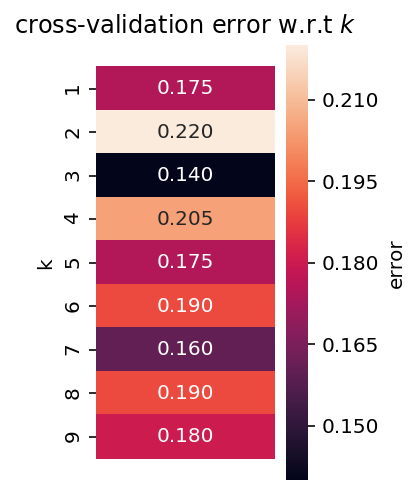

In [5]:
# Draw heatmaps for result of grid search.
def draw_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='k')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [ ]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))